# **Problema de Galería de Arte**

Algunas cosas necesarias:


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [50]:
def cross(p0, p1, p2): #origen comun, p1 , p2
  return((p1.x - p0.x)*(p2.y- p0.y)- (p2.x - p0.x)*(p1.y-p0.y))

def turn(p0, p1, p2):
  if cross(p0,p1,p2)>0:
    return True #izquierda
    #print(f"En {p1} se hace un giro en sentido anti-horario")
  elif cross(p0,p1,p2)<0:
    return False #derecha
    #print(f"En {p1} se hace un giro en sentido horario")
  else:
    return False #no hay giro
    #print(f"En {p1} no se hace giro")

In [69]:
#clase punto que es para un vértice, tiene x, y, y su nombre
class Point:
  #constructor
  def __init__(self, x, y, name):
    self.x = x
    self.y = y
    self.name = name
    self.type = None
  #metodos de la clase
  def __repr__(self):
    return(f"({self.x}, {self.y})")

  def __str__(self):
    return(f"({self.x}, {self.y})")

In [49]:
class Edge:
  def __init__(self, startp, endp):
    self.startp = startp
    self.endp = endp

  def __repr__(self):
    return(f"(inicio: {self.startp}, final: {self.endp})")


In [21]:
#graficar ploigonooos
def polygon(points):
  xcoor = []
  ycoor = []
  for i in points:
    plt.scatter(i.x, i.y, marker = 'o', color = 'blue')
    xcoor.append(i.x)
    ycoor.append(i.y)
  xcoor.append(points[0].x)
  ycoor.append(points[0].y)
  plt.plot(xcoor, ycoor,color = 'limegreen')
  plt.grid(True)
  plt.show()

## **Listas de aristas doble conectadas**

In [38]:
#semi arista
class HalfEdge:
  def __init__(self, startp, endp):
    self.startp = startp
    self.endp = endp
    self.twin = None
    self.next = None
    self.prev = None
    self.face = None
    self.name = f'e{startp.name[1]}1'

  def __repr__(self):
    #return(f"(inicio: {self.startp}, final: {self.endp})")
    return (f'{self.name}')

In [51]:
#Saca las aristas del polígono
def EdgesList(points):

  edges = []
  for i in range(len(points)-1):
    e = HalfEdge(points[i], points[i+1])
    edges.append(e)

  edges.append(HalfEdge(points[-1], points[0]))
  return edges

In [53]:
#Twin de la semi arista
def twin(x):
  if x.name[2] == "1":
    return str(x.name[0]+x.name[1]+"2")
  else:
    return str(x.name[0] + x.name[1] + "1")

In [55]:
#Asigna prev, next y twin a la semi arista
def AssignValues (edges):


  for i in range(len(edges)-1):
    e = edges[i]
    e.next = edges[i+1]
    e.prev = edges[i-1]
    e.twin = twin(e)
  
  e = edges[-1]
  e.next = edges[0]
  e.prev = edges[-2]
  e.twin = twin(e)

  return edges

In [57]:
#imprime un df de la lista de aristas doble conectadas

def ListOfedges(edges):
    names, origin, twins, next, prev, face = [],[],[],[],[], []
    for e in edges:
      names.append(e)
      origin.append(e.startp)
      twins.append(e.twin)
      next.append(e.next)
      prev.append(e.prev)
      face.append(e.face)

    df = {'Arista': names, 'Origen': origin, 'Twin': twins, 'Next': next, 
          'Previous': prev, 'CaraIn': face}
    dcel = pd.DataFrame(df)

    return dcel

In [58]:
p = [Point(1,5,'p1'), Point(-1,-1,'p2'), Point(2,2, 'p3'), Point(5,-2,'p4'), Point(8,3,'p5'), Point(5,1,'p6')]

In [59]:
edges = EdgesList(p)
edges = AssignValues(edges)


In [60]:
ListOfedges(edges)

,Arista,Origen,Twin,Next,Previous,CaraIn
0,e11,"(1, 5)",e12,e21,e61,None
1,e21,"(-1, -1)",e22,e31,e11,None
2,e31,"(2, 2)",e32,e41,e21,None
3,e41,"(5, -2)",e42,e51,e31,None
4,e51,"(8, 3)",e52,e61,e41,None
5,e61,"(5, 1)",e62,e11,e51,None


## **Clasificación de vértices**

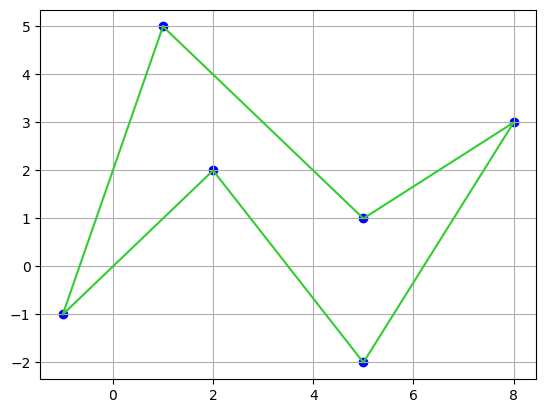

In [61]:
p = [Point(1,5,'p1'), Point(-1,-1,'p2'), Point(2,2, 'p3'), Point(5,-2,'p4'), Point(8,3,'p5'), Point(5,1,'p6')]
polygon(p)

In [70]:
#Definimos las funciones para clasificar los vertices:
def setEdges(p): #retorna las aristas del poligono
  edges = []
  for i in range(len(p)-1):
    edges.append(Edge(p[i], p[i+1]))

  edges.append(Edge(p[-1], p[0]))
  #print(edges)
  return edges

def SortBy(p): #ordena los puntos en el orden mostrado en clase
  sorted = []
  pointsc = p.copy()
  print(pointsc)
  while len(pointsc):
    pi = pointsc[0]
    for q in pointsc:
      if (pi.y > q.y) or (pi.y == q.y and pi.x < q.x):
        pi = pi
      else:
        pi = q
    sorted.append(pi)
    pointsc.pop(pointsc.index(pi))
  return sorted
  #print(sorted)

def SetType(sorted, edges): #clasifica los vertices segun su tipo
  for point in sorted:
    for edge in edges:
      index = edges.index(edge)-1
      if point == edge.startp and point.y > edge.endp.y and point.y > edges[index].startp.y:
        if turn(edge.startp, edge.endp, edges[index].startp):
          point.type = "start"

        else:
          point.type = "split"

      elif point == edge.startp and point.y < edge.endp.y and point.y < edges[index].startp.y:
        if turn(edge.startp, edge.endp, edges[index].startp):
          point.type = "end"

        else:
          point.type = "merge"


  for point in sorted:
    if point.type == None:
      point.type = "normi"

    #print(point, point.type)

In [71]:
def polygon_byType(points, vcolor, lcolor):
  #grafica el poligono
  edges = setEdges(points)
  sorted = SortBy(points)
  SetType(sorted, edges)

  xcoor = []
  ycoor = []
  for i in points:
    if i.type =="start":
      plt.scatter(i.x, i.y, marker = 's', facecolor = 'none', edgecolor = vcolor, s=80)
    elif i.type == "end":
      plt.scatter(i.x, i.y, marker = 's', color = vcolor, s=80)
    elif i.type == "merge":
      plt.scatter(i.x, i.y, marker = 'v', color = vcolor, s=80)
    elif i.type == "split":
      plt.scatter(i.x, i.y, marker = '^', color = vcolor, s=80)
    else:
      plt.scatter(i.x, i.y, marker = 'o', color = vcolor)
    xcoor.append(i.x)
    ycoor.append(i.y)
  xcoor.append(points[0].x)
  ycoor.append(points[0].y)
  plt.plot(xcoor, ycoor,color = lcolor)
  plt.title("Polygon with classified types of vertices")
  plt.show()

[(1, 5), (-1, -1), (2, 2), (5, -2), (8, 3), (5, 1)]


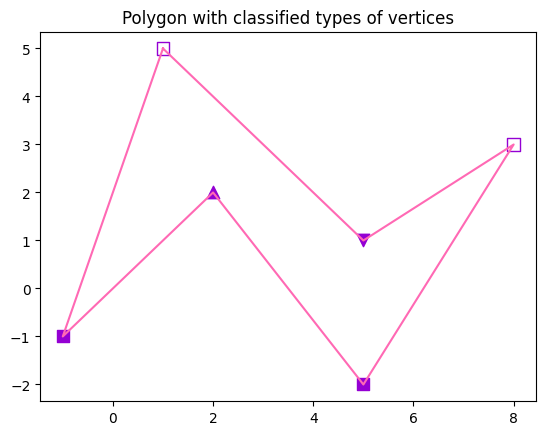

In [72]:
polygon_byType(p, 'darkviolet', 'hotpink')

In [73]:
def toPoint(P):
  #pasa una lista de puntos a una lista de elementos de la clase puntos
  points = []
  for i in range(len(P)):
    points.append(Point(P[i][0], P[i][1], 'p' + str(i)))
  
  return points

[(3.1, 2.9), (2.95, 2.8), (2.9, 4.5), (2.7, 4), (2.5, 4.5), (2.3, 3.9), (2.4, 3.2), (2.3, 2.5), (2.2, 3.1), (2.1, 1.5), (2.3, 0.7), (2.5, 1.1), (2.8, 0.5), (2.7, 2), (3, 1.7)]


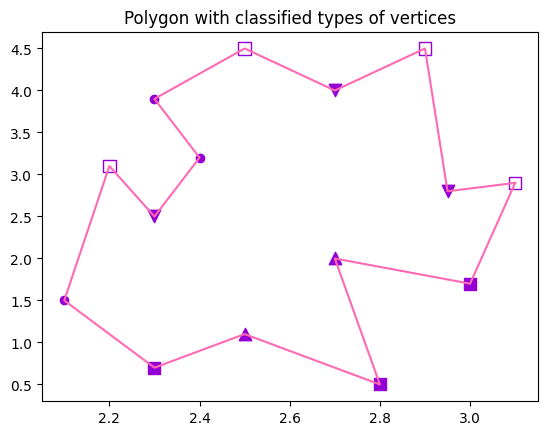

In [75]:
pointsBook = [(3.1,2.9),(2.95,2.8),(2.9,4.5),(2.7,4),(2.5,4.5),(2.3,3.9),
          (2.4,3.2),(2.3,2.5),(2.2,3.1),(2.1,1.5),(2.3,0.7),(2.5,1.1),(2.8,0.5),
          (2.7,2),(3,1.7)]

points = toPoint(pointsBook)

polygon_byType(points, 'darkviolet', 'hotpink')

## **División en piezas Y-monótonas**

## **Triangulación**